In [2]:
import sys

lib_dir = "/home/daniele/documents/github/ftt01/phd/share/lib"
sys.path.insert( 0, lib_dir )

from lib import *
import subprocess
import psycopg2
# import datetime as dt

In [3]:
class local_args():

    def __init__(self) -> None:
        pass

    def add_start_date(self,  start_date):
        self.start_date = start_date
    
    def add_end_date(self,  end_date):
        self.end_date = end_date

    def add_variable(self,  variable):
        self.variable = variable

    def add_output_path(self,  output_path):
        self.output_path = output_path
        mkNestedDir( output_path )

In [4]:
try:
    input_parser = argparse.ArgumentParser()
    input_parser.add_argument('start_date', type=str)
    input_parser.add_argument('end_date', type=str)
    input_parser.add_argument('variable', type=str)
    input_parser.add_argument('output_path', type=str)
    args = input_parser.parse_args()
except:
    args = local_args()
    args.add_start_date("2010-01-01T00:00:00")
    args.add_end_date("2019-12-31T23:59:00")
    args.add_variable("2t")
    args.add_output_path("/media/windows/projects/bias_correction/applications/era5land/data/10years/outputs/")

usage: ipykernel_launcher.py [-h] start_date end_date variable output_path
ipykernel_launcher.py: error: the following arguments are required: start_date, end_date, variable, output_path


In [5]:
# start_date = dt.datetime.strptime( args.start_date, '%Y-%m-%dT%H:%M:%S' )
# end_date = dt.datetime.strptime( args.end_date, '%Y-%m-%dT%H:%M:%S' )
# aggregation_at = '1H'
# dates = pd.date_range(start_date, end_date, freq=aggregation_at)

In [ ]:
def get_postgres_connection():

    db_name = 'meteo'
    db_user = 'postgres'
    db_password = 'password'
    db_host = 'IP'

    return psycopg2.connect(database=db_name, user=db_user, password=db_password, host=db_host)

In [7]:
grid_metadata = "/media/windows/projects/bias_correction/applications/era5land/data/10years/gridERA5LandTAA2700buffer.csv"

In [8]:
def sql_to_dataframe(conn, query, column_names):

    cursor = conn.cursor()
    try:
        cursor.execute(query)
    except (Exception, psycopg2.DatabaseError) as error:
        print("Error: %s" % error)
        cursor.close()
        return 1
    # The execute returns a list of tuples:
    tuples_list = cursor.fetchall()
    cursor.close()
    # Now we need to transform the list into a pandas DataFrame:
    df = pd.DataFrame(tuples_list, columns=column_names)
    return df

In [9]:
def reorder_columns_ids(df, id_type='str'):
    cols = df.columns
    cols = np.array([ int(i) for i in cols ])
    cols = cols[np.argsort(cols)]
    if id_type == 'str':
        cols = [ str(i) for i in cols ]

    return df[cols]

In [10]:
grid = pd.read_csv(grid_metadata)

In [11]:
ids = grid['id'].values

In [12]:
ids

array([ 868,  892,  894,  895,  896,  897,  898,  899,  900,  923,  924,
        925,  926,  927,  928,  929,  930,  931,  932,  933,  934,  935,
        949,  950,  951,  952,  953,  956,  957,  958,  959,  960,  961,
        962,  963,  964,  965,  966,  967,  968,  982,  983,  984,  985,
        986,  987,  988,  989,  990,  991,  992,  993,  994,  995,  996,
        997,  998,  999, 1000, 1001, 1002, 1016, 1017, 1018, 1019, 1020,
       1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031,
       1033, 1034, 1049, 1050, 1051, 1052, 1053, 1054, 1055, 1056, 1057,
       1058, 1059, 1060, 1061, 1062, 1083, 1084, 1085, 1086, 1087, 1088,
       1089, 1090, 1091, 1092, 1093, 1094, 1095, 1116, 1117, 1118, 1119,
       1120, 1121, 1122, 1123, 1124, 1125, 1126, 1127, 1128, 1129, 1149,
       1150, 1151, 1152, 1153, 1154, 1155, 1156, 1157, 1158, 1159, 1160,
       1161, 1162, 1181, 1182, 1183, 1184, 1185, 1186, 1187, 1188, 1189,
       1190, 1191, 1192, 1193, 1194, 1195, 1214, 12

In [13]:
p_era5_data = pd.read_csv('/media/windows/projects/bias_correction/applications/era5land/data/10years/p_era5_renamed.csv', parse_dates=True, index_col=0)
p_era5_data = reorder_columns_ids(p_era5_data)
p_era5_mean = round(p_era5_data.resample('Y').sum().mean(axis=0), 2)
p_era5_data = p_era5_data[[str(i) for i in ids]]
p_era5_data.describe().mean(axis=1)

count    87647.000000
mean         0.167072
std          0.449372
min         -0.000967
25%          0.000000
50%          0.006411
75%          0.103564
max          8.115272
dtype: float64

In [14]:
p_era5_data_30 = pd.read_csv('/media/windows/projects/bias_correction/applications/era5land/data/30years/precipitation_era5land.csv', parse_dates=True, index_col=0)

p_era5_data_30 = p_era5_data_30[args.start_date:args.end_date]

p_era5_data_30 = reorder_columns_ids(p_era5_data_30)
p_era5_data_30_mean = round(p_era5_data_30.resample('Y').sum().mean(axis=0), 2)
p_era5_data_30 = p_era5_data_30[[str(i) for i in ids]]
p_era5_data_30.describe().mean(axis=1)

count    87648.000000
mean         0.167070
std          0.449369
min         -0.000967
25%          0.000000
50%          0.006411
75%          0.103562
max          8.115272
dtype: float64

In [15]:
t_era5_data = pd.read_csv('/media/windows/projects/bias_correction/applications/era5land/data/10years/t_era5_renamed.csv', parse_dates=True, index_col=0)
t_era5_data = reorder_columns_ids(t_era5_data)
t_era5_mean = round(t_era5_data.resample('Y').mean().mean(axis=0), 2)
t_era5_data = t_era5_data[[str(i) for i in ids]]

t_era5_data.describe().mean(axis=1)

count    87647.000000
mean         4.599168
std          8.288230
min        -24.853239
25%         -1.496253
50%          4.609094
75%         10.955283
max         27.944150
dtype: float64

In [16]:
t_era5_data_30 = pd.read_csv('/media/windows/projects/bias_correction/applications/era5land/data/30years/temperature_era5land.csv', parse_dates=True, index_col=0)
t_era5_data_30 = reorder_columns_ids(t_era5_data_30)
t_era5_mean_30 = round(t_era5_data_30.resample('Y').mean().mean(axis=0), 2)
t_era5_data_30 = t_era5_data_30[[str(i) for i in ids]]

t_era5_data_30 = t_era5_data_30[args.start_date:args.end_date]

t_era5_data_30.describe().mean(axis=1)

count    87648.000000
mean         4.599063
std          8.288242
min        -24.853239
25%         -1.496442
50%          4.608950
75%         10.955200
max         27.944150
dtype: float64

In [17]:
p_kr_data = pd.read_csv('/media/windows/projects/bias_correction/applications/era5land/data/10years/p_krig_renamed.csv', parse_dates=True, index_col=0)
p_kr_data = reorder_columns_ids(p_kr_data)
p_kr_mean = round(p_kr_data.resample('Y').sum().mean(axis=0), 2)
p_kr_data = p_kr_data[[str(i) for i in ids]]

p_kr_data.describe().mean(axis=1)

count    87647.000000
mean         0.128673
std          0.583982
min         -0.111263
25%          0.000000
50%          0.000000
75%          0.003653
max         20.214037
dtype: float64

In [18]:
p_kr_data_30 = pd.read_csv('/media/windows/projects/bias_correction/applications/era5land/data/30years/precipitation_kriging.csv', parse_dates=True, index_col=0)
p_kr_data_30 = reorder_columns_ids(p_kr_data_30)
p_kr_mean_30 = round(p_kr_data_30.resample('Y').sum().mean(axis=0), 2)
p_kr_data_30 = p_kr_data_30[[str(i) for i in ids]]

p_kr_data_30 = p_kr_data_30[args.start_date:args.end_date]

p_kr_data_30.describe().mean(axis=1)

count    87648.000000
mean         0.137936
std          0.501682
min          0.000000
25%          0.000000
50%          0.000000
75%          0.030097
max         14.796006
dtype: float64

In [19]:
t_kr_data = pd.read_csv('/media/windows/projects/bias_correction/applications/era5land/data/10years/t_krig_renamed.csv', parse_dates=True, index_col=0)
t_kr_data = reorder_columns_ids(t_kr_data)
t_kr_mean = round(t_kr_data.resample('Y').mean().mean(axis=0), 2)
t_kr_data = t_kr_data[[str(i) for i in ids]]

t_kr_data.describe().mean(axis=1)

count    87647.000000
mean         6.999232
std          7.912824
min        -16.804141
25%          0.829315
50%          6.833405
75%         12.896997
max         31.545162
dtype: float64

<AxesSubplot:xlabel='datetime'>

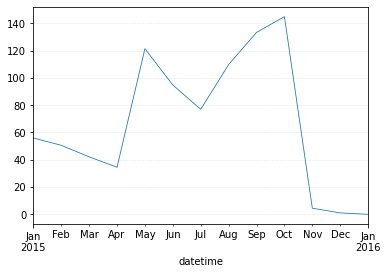

In [49]:
p_kr_data_30['2015-01-01 00:00:00':'2016-01-01 00:00:00'].resample("MS").sum().mean(axis=1).plot()

In [50]:
p_kr_data_30['2015-01-01 00:00:00':'2016-01-01 00:00:00'].resample("MS").sum().mean(axis=1)


datetime
2015-01-01     55.958722
2015-02-01     50.590315
2015-03-01     42.120324
2015-04-01     34.480005
2015-05-01    121.375054
2015-06-01     94.741415
2015-07-01     76.967775
2015-08-01    109.762365
2015-09-01    133.326661
2015-10-01    144.874414
2015-11-01      4.482238
2015-12-01      1.033642
2016-01-01      0.000000
Freq: MS, dtype: float64

<AxesSubplot:xlabel='datetime'>

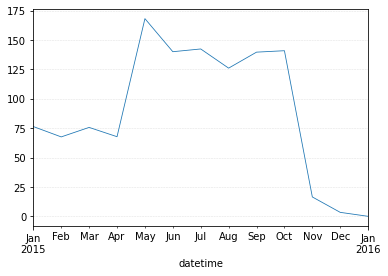

In [30]:
p_era5_data['2015-01-01 00:00:00':'2016-01-01 00:00:00'].resample("MS").sum().mean(axis=1).plot()

In [32]:
p_bias = p_kr_data['2015-01-01 00:00:00':'2016-01-01 00:00:00'].resample("MS").sum() - p_era5_data['2015-01-01 00:00:00':'2016-01-01 00:00:00'].resample("MS").sum()

<AxesSubplot:xlabel='datetime'>

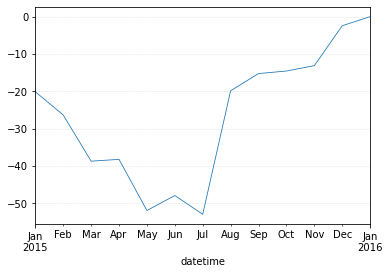

In [33]:
p_bias.mean(axis=1).plot()

<AxesSubplot:xlabel='datetime'>

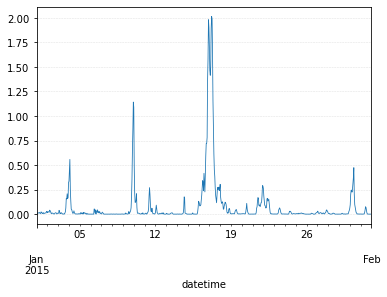

In [36]:
p_kr_data['2015-01-01 00:00:00':'2015-02-01 00:00:00'].mean(axis=1).plot()

<AxesSubplot:xlabel='datetime'>

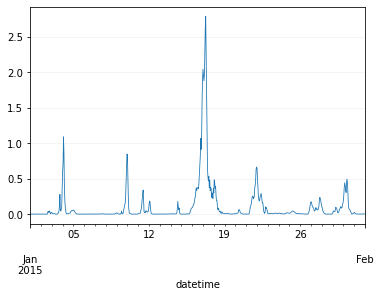

In [37]:
p_era5_data['2015-01-01 00:00:00':'2015-02-01 00:00:00'].mean(axis=1).plot()

In [48]:
p_era5_data['2015-01-01 00:00:00':'2015-02-01 00:00:00'].mean(axis=1).sum()

76.35888888888888

In [38]:
p_bias = p_kr_data['2015-01-01 00:00:00':'2015-02-01 00:00:00'] - p_era5_data['2015-01-01 00:00:00':'2015-02-01 00:00:00']

<AxesSubplot:>

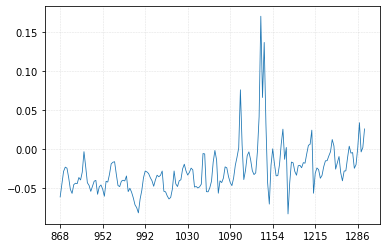

In [45]:
p_bias.mean(axis=0).plot()

In [44]:
t_kr_data_30 = pd.read_csv('/media/windows/projects/bias_correction/applications/era5land/data/30years/temperature_kriging.csv', parse_dates=True, index_col=0)
t_kr_data_30 = reorder_columns_ids(t_kr_data_30)
t_kr_mean_30 = round(t_kr_data_30.resample('Y').mean().mean(axis=0), 2)
t_kr_data_30 = t_kr_data_30[[str(i) for i in ids]]

t_kr_data_30 = t_kr_data_30[args.start_date:args.end_date]

t_kr_data_30.describe().mean(axis=1)

count    87648.000000
mean         6.587712
std          7.884786
min        -17.612214
25%          0.471150
50%          6.395338
75%         12.436588
max         31.370556
dtype: float64

In [ ]:
t_kr_data_30.mean(axis=1).plot()

<AxesSubplot:>

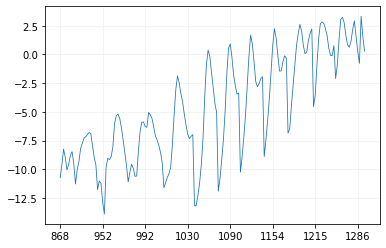

In [17]:
t_era5_data.iloc[0].plot()

<AxesSubplot:>

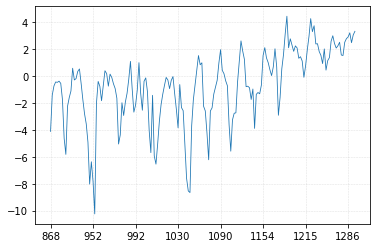

In [18]:
t_kr_data.iloc[0].plot()

<AxesSubplot:xlabel='datetime'>

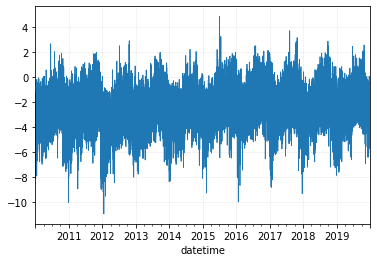

In [19]:
(t_era5_data.mean(axis=1) - t_kr_data.mean(axis=1)).plot()

<AxesSubplot:xlabel='datetime'>

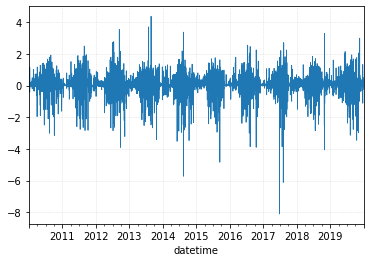

In [20]:
(p_era5_data.mean(axis=1) - p_kr_data.mean(axis=1)).plot()

In [20]:
p_bias = ( p_kr_data.resample('Y').sum() - p_era5_data.resample('Y').sum() ).mean()

In [21]:
# p_biases = []

# for i in grid.index:
#     c_id = str(int(grid.loc[i]['ID']))

#     p_biases.append(p_bias[c_id])

# grid['p_bias'] = p_biases

In [22]:
# grid.to_csv('/media/windows/projects/bias_correction/applications/era5/data/pre_processed/outputs/EGUplots/p_biases.csv')

In [23]:
p_era5_datas = []
t_era5_datas = []
p_kr_datas = []
t_kr_datas = []

for i in grid.index:
    c_id = str(int(grid.loc[i]['id']))

    p_era5_datas.append(p_era5_mean[c_id])
    t_era5_datas.append(t_era5_mean[c_id])
    p_kr_datas.append(p_kr_mean[c_id])
    t_kr_datas.append(t_kr_mean[c_id])

grid['p_era5'] = p_era5_datas
grid['t_era5'] = t_era5_datas
grid['p_kr'] = p_kr_datas
grid['t_kr'] = t_kr_datas

In [24]:
grid.set_index('id', inplace=True)

In [25]:
grid.to_csv('/media/windows/projects/bias_correction/applications/era5/data/pre_processed/outputs/EGUplots/p_t_yearly_temporal_mean.csv')

In [26]:
# p_era5_data.to_csv('/media/windows/projects/bias_correction/applications/era5/data/pre_processed/reordered/p_era5.csv')
# t_era5_data.to_csv('/media/windows/projects/bias_correction/applications/era5/data/pre_processed/reordered/t_era5.csv')
# p_kr_data.to_csv('/media/windows/projects/bias_correction/applications/era5/data/pre_processed/reordered/p_krig.csv')
# t_kr_data.to_csv('/media/windows/projects/bias_correction/applications/era5/data/pre_processed/reordered/t_krig.csv')